In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostRegressor
import warnings

In [3]:
df = pd.read_csv('stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X=df.drop(columns=['math_score'])
Y=df['math_score']
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [6]:
# combine col_transformer with three types of Transformer

num_feature = X.select_dtypes(exclude='object').columns
catg_feature = X.select_dtypes(include='object').columns
num_feature

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessing = ColumnTransformer([
    ('OneHotEncoding',categorical_transformer,catg_feature),
    ('StandardScaler',numerical_transformer,num_feature)
])

 

In [7]:
X_transform=preprocessing.fit_transform(X)

In [8]:
X_transform.shape

(1000, 19)

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X_transform,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [10]:
# Create a Evaluation Function to give all metrices after model Trainig
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [11]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbour Regressor": KNeighborsRegressor(),
    "DecisionTree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for name, model in models.items():

    model.fit(X_train, Y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(Y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(Y_test, y_test_pred)

    print(name)
    model_list.append(name)

    print('Model performance for Training set')
    print("- Root Mean Square Error : {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error    : {:.4f}".format(model_train_mae))
    print("- R2 Score               : {:.4f}".format(model_train_r2))
    
    print('--------------------------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Square Error : {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error    : {:.4f}".format(model_test_mae))
    print("- R2 Score               : {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print("=" * 40)
    print("\n")


LinearRegression
Model performance for Training set
- Root Mean Square Error : 5.3231
- Mean Absolute Error    : 4.2667
- R2 Score               : 0.8743
--------------------------------------------------
Model performance for Test set
- Root Mean Square Error : 5.3940
- Mean Absolute Error    : 4.2148
- R2 Score               : 0.8804


Lasso
Model performance for Training set
- Root Mean Square Error : 6.5938
- Mean Absolute Error    : 5.2063
- R2 Score               : 0.8071
--------------------------------------------------
Model performance for Test set
- Root Mean Square Error : 6.5197
- Mean Absolute Error    : 5.1579
- R2 Score               : 0.8253


Ridge
Model performance for Training set
- Root Mean Square Error : 5.3233
- Mean Absolute Error    : 4.2650
- R2 Score               : 0.8743
--------------------------------------------------
Model performance for Test set
- Root Mean Square Error : 5.3904
- Mean Absolute Error    : 4.2111
- R2 Score               : 0.8806


K-

In [13]:
pd.DataFrame(list(zip(model_list,r2_list)) ,columns=['Model Name','R2_score']).sort_values(by=['R2_score'],ascending=False)


,Model Name,R2_score
2,Ridge,0.880593
0,LinearRegression,0.880433
5,Random Forest Regressor,0.852402
7,CatBoost Regressor,0.851632
8,AdaBoost Regressor,0.843993
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbour Regressor,0.783813
4,DecisionTree Regressor,0.746998


In [15]:
CLF= LinearRegression()
CLF.fit(X_train,Y_train)
y_pred = CLF.predict(X_test)
score = r2_score(Y_test,y_pred)*100
print("accuracy of Model is %.2f" %score) 

accuracy of Model is 88.04


Text(0.5, 0, 'predicted')

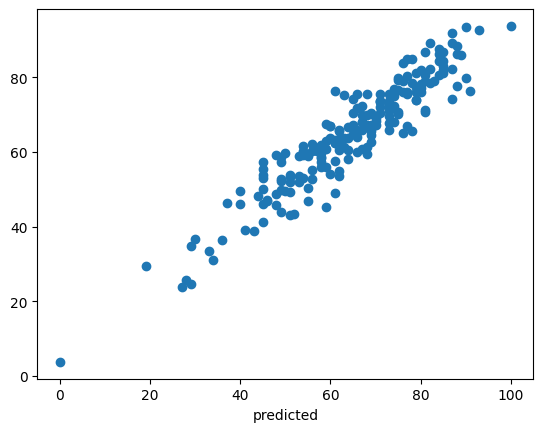

In [18]:
plt.scatter(Y_test,y_pred)
plt.xlabel('Actual')
plt.xlabel('predicted')




<Axes: xlabel='math_score'>

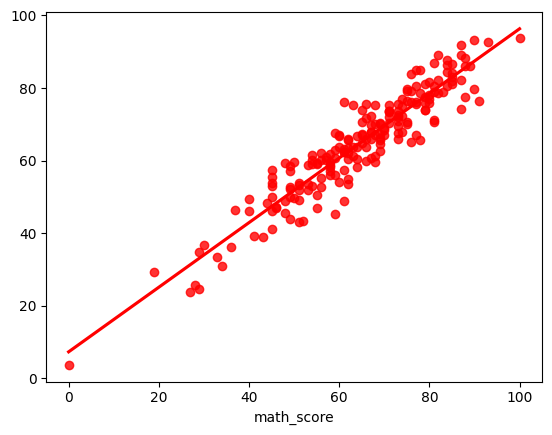

In [20]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color='red')